In [1]:
import pandas as pd
import numpy as np
import random
import csv
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import math
import random
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data = data.dropna(axis=0,how='any')
data.reset_index()
data = data.drop(data[data.Occupation=='_______'].index)
data = data.drop(data[data.Credit_Mix=='_'].index)

In [4]:
from sklearn.preprocessing import LabelEncoder
data['Occupation'] = LabelEncoder().fit_transform(data['Occupation'])
data['Credit_Mix'] = LabelEncoder().fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = LabelEncoder().fit_transform(data['Payment_of_Min_Amount'])
data['Month'] = LabelEncoder().fit_transform(data['Month'])
data['Credit_Score'] = LabelEncoder().fit_transform(data['Credit_Score'])

In [5]:
data = data.drop(columns = ['Monthly_Inhand_Salary','Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding',
        'Credit_History_Age',
       'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Monthly_Balance'],axis=1)

In [6]:
predictor = data.columns[1:12]

In [7]:
data = data.drop(data[data.Age>100].index)

In [8]:
data = data.sample(n=5000, random_state = 42)

In [9]:
from sklearn import preprocessing
predictors = data.columns[1:12]
X = data[predictors]
y = data.Credit_Score
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X,y)

In [10]:
#利用训练集建模
from sklearn import linear_model
sklearn_logistic = linear_model.LogisticRegression()
sklearn_logistic.fit(X,y)

LogisticRegression()

In [11]:
#返回模型的各个参数
print(sklearn_logistic.intercept_,sklearn_logistic.coef_)

[-2.89536926e-07] [[ 1.21137314e-05 -3.41161058e-04  5.08496957e-06 -2.10132988e-09
   4.53794744e-04  2.84783886e-04  1.90361963e-05  1.55659476e-04
   8.94946845e-04  2.31290349e-04 -5.23102281e-05]]


In [12]:
sklearn_logistic =  linear_model.LogisticRegression()
scores = cross_val_score(sklearn_logistic,X,y,scoring='roc_auc')
print(np.mean(scores))

0.622394698585335


In [13]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
%%time
sklearn_logistic.fit(X_train,y_train)

CPU times: total: 15.6 ms
Wall time: 2.25 ms


LogisticRegression()

In [15]:
logistic_pred = sklearn_logistic.predict(X_test)

In [16]:
print("模型在测试集的预测准确率：\n",metrics.accuracy_score(y_test,logistic_pred))

模型在测试集的预测准确率：
 0.5100882723833543


In [17]:
y_test.value_counts()

1    809
0    777
Name: Credit_Score, dtype: int64

In [18]:
#导入第三方模块
import matplotlib.pyplot as plt
#y得分为模型预测正例的概率
y_score = sklearn_logistic.predict_proba(X_test)[:,1]
#计算不同阈值下，fpr和tpr的组合之，其中fpr表示1-Specificity，tpr表示Sensitivity
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)
#计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

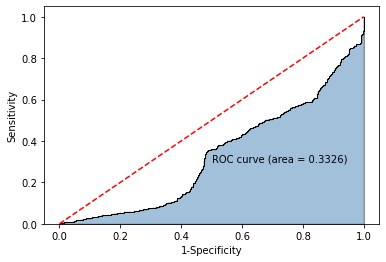

In [19]:
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加ROC曲线的轮廓
plt.plot(fpr,tpr,color='black',lw=1)

#添加对角线
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

In [20]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.25,random_state=42)

In [21]:
classfier = svm.SVC(C=6,gamma=0.001,kernel='rbf',probability=True)

In [22]:
classfier.fit(X_train,y_train)

SVC(C=6, gamma=0.001, probability=True)

In [23]:
pred_svc = classfier.predict(X_test)

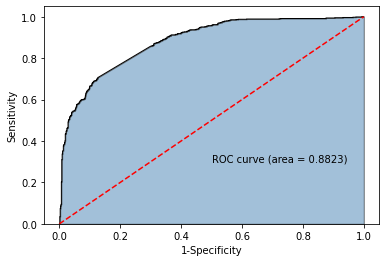

In [24]:
y_score = classfier.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_score)

#计算AUC值
roc_auc = metrics.auc(fpr,tpr)
#绘制面积图
plt.stackplot(fpr,tpr,color='steelblue',alpha=0.5,edgecolor='black')

#添加边际线和对角线
plt.plot(fpr,tpr,color = 'black',lw = 1)
plt.plot([0,1],[0,1],color = 'red',linestyle = '--')

#添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.4f)'%roc_auc)

#添加x轴和y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()